# 03 - Feature Selection

In this notebook, we perform feature selection using different methods:
- Feature Importance (Random Forest)
- Recursive Feature Elimination (RFE)
- Chi-Square Test


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## Step 1: Load Cleaned Dataset


In [11]:
# Load the cleaned dataset
df = pd.read_csv('data/heart_disease.csv')
df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,0.613803,2.344950,4.543948,-0.816134,2.211090,1.823751,1.455185,0.016348,-0.099221,-0.112827,0
1,3.469339,0.918380,-1.175232,-0.840263,0.171983,0.848224,-0.043497,0.169923,-0.411693,-0.208924,1
2,3.324561,-0.720734,-0.461900,-0.046004,-0.745340,0.324757,-0.234373,0.576024,-0.997485,-0.259045,1
3,-1.689203,0.408676,3.827134,1.035580,-0.098559,-2.351468,1.106077,0.902457,-0.917294,0.236137,0
4,-2.545574,-0.438278,-0.015576,-1.271556,1.218582,-0.335912,0.392801,1.227352,-0.007793,-0.462969,0


## Step 2: Separate Features and Target


In [4]:
X = df.drop('target', axis=1)
y = df['target']


## Step 3: Feature Importance (Random Forest)


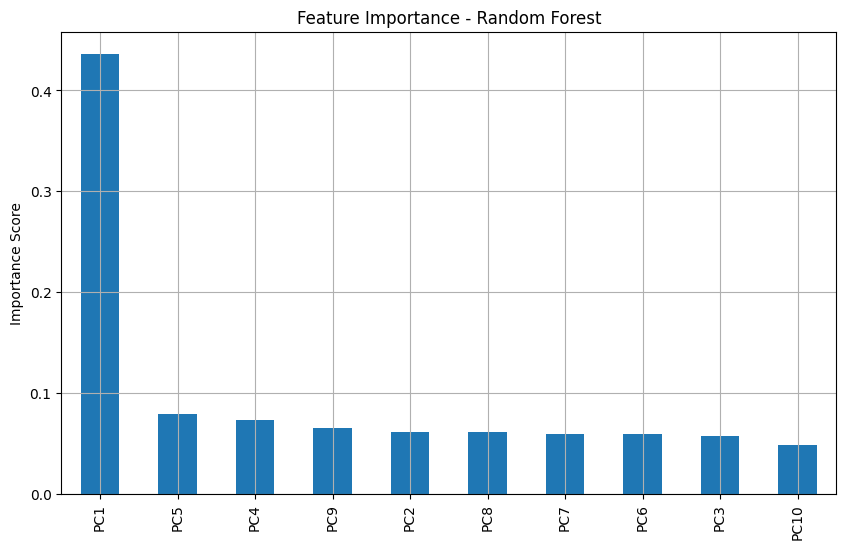

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importance - Random Forest')
plt.ylabel('Importance Score')
plt.grid(True)
plt.show()


## Step 4: Recursive Feature Elimination (RFE)
Use Logistic Regression to recursively remove least important features.


In [6]:
from sklearn.linear_model import LogisticRegression

rfe_model = LogisticRegression(max_iter=1000)
rfe = RFE(rfe_model, n_features_to_select=10)
rfe.fit(X, y)

selected_rfe = X.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_rfe)


Selected Features by RFE:
Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], dtype='object')


## Step 5: Chi-Square Test
Chi-Square is used for categorical input and categorical output.


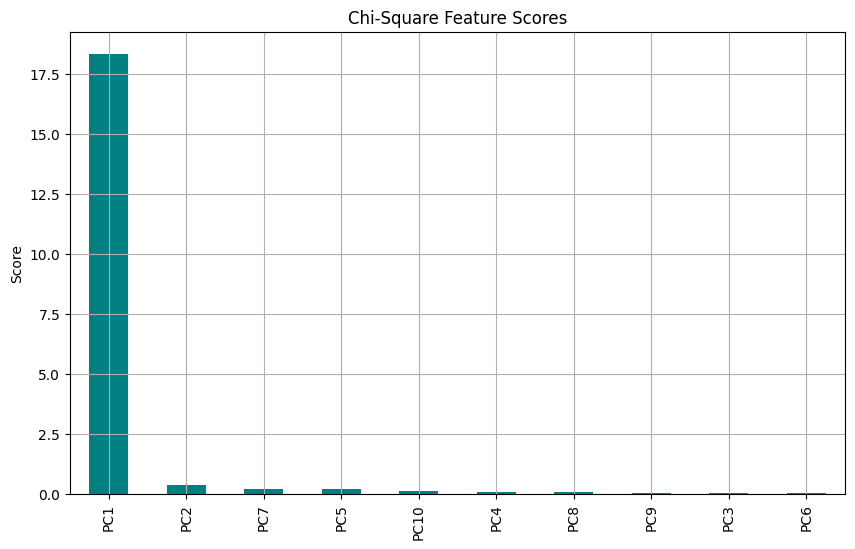

In [7]:
# Chi-Square requires non-negative data
X_scaled = MinMaxScaler().fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_scaled, y)

chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns)
chi2_scores = chi2_scores.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
chi2_scores.plot(kind='bar', color='teal')
plt.title('Chi-Square Feature Scores')
plt.ylabel('Score')
plt.grid(True)
plt.show()


## Step 6: Final Feature Selection
Select intersection of top features from all methods (or manually choose).


In [ ]:
selected_features = list(importances.head(10).index)
print("Final Selected Features:", selected_features)

X_reduced = df[selected_features + ['target']]
X_reduced.to_csv('data/heart_disease_selected.csv', index=False)


Final Selected Features: ['PC1', 'PC5', 'PC4', 'PC9', 'PC2', 'PC8', 'PC7', 'PC6', 'PC3', 'PC10']
